In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

In [114]:
df = pd.read_csv('data/train.csv')

In [115]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [116]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Lots of text fields that will need to be encoded (maybe try catboost)
* Lots of missing values, especially in categoricals
* Some in numerical values that I should try to impute
* Medium number of features and not that much data (should try some simple models)
* May want to bucket some of the numerical features like year built'
* MSSubClass is actually a categorical


In [ ]:
df.MSSubClass = df.MSSubClass.astype(str)
df = pd.get_dummies(df)

In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice', 'Id'], axis=1).values
y = df.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [142]:
df.describe().transpose().loc[lambda x: x['count'] != 1460]

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


* After getting dummy variables there are 304 features which is likely too many for OLS
* Will need to use some kind of feature selection or regularization
* Still a few missing values to impute
* Try a simple pipeline with regression, random forest, gboosting

## First Pass

In [147]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

param_grid = [{'scaler': [MinMaxScaler(), None],
               'regressor': [RandomForestRegressor(n_estimators=100)],
               'regressor__min_samples_split': [5, 10],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [GradientBoostingRegressor()],
               'regressor__max_depth': [2, 3, 4, 5, 6],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1, 10]}
             ]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'scaler': [MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'regressor': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_l...  normalize=False, random_state=None, solver='auto', tol=0.001)], 'regressor__alpha': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_log_error', ve

In [148]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_features', 'param_regressor__max_depth',
            'param_scaler', 'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_features,param_regressor__max_depth,param_scaler,rank_test_score,rmsle
29,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,None,1,0.131405
28,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,"MinMaxScaler(copy=True, feature_range=(0, 1))",2,0.131544
35,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,None,3,0.131551
31,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,None,4,0.131859
24,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,4,"MinMaxScaler(copy=True, feature_range=(0, 1))",5,0.132377
25,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,4,None,6,0.132657
23,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,None,7,0.132780
34,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",8,0.133133
30,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",9,0.134031
46,"Ridge(alpha=10, copy_X=True, fit_intercept=Tru...",NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.134229


In [149]:
grid.best_params_

{'regressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=4, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
 'regressor__max_depth': 4,
 'regressor__max_features': 0.3,
 'scaler': None}

* Ridge regression is able to do alright despite the lack of feature engineering
* Gradient Boosting does well should try others like xgboost and catboost
* Should probably look at the data to reduce the feature space.
* Should also look at residuals to seem if fit is reasonable

In [198]:
pd.Series(grid.best_estimator_.named_steps.regressor.feature_importances_,
          index=df.drop(['SalePrice', 'Id'], axis=1).columns.values).sort_values()[::-1]


OverallQual             0.146196
GrLivArea               0.136011
GarageCars              0.090377
GarageArea              0.075258
TotalBsmtSF             0.074963
ExterQual_TA            0.065781
YearBuilt               0.053677
GarageYrBlt             0.051217
1stFlrSF                0.050114
BsmtFinSF1              0.030762
FullBath                0.027542
TotRmsAbvGrd            0.019707
Fireplaces              0.019049
LotArea                 0.018337
2ndFlrSF                0.012379
MSSubClass_60           0.012192
YearRemodAdd            0.011946
BsmtQual_Ex             0.009816
KitchenQual_Ex          0.006863
MasVnrArea              0.006381
OverallCond             0.006157
BsmtUnfSF               0.005641
ExterQual_Gd            0.003626
CentralAir_Y            0.003075
WoodDeckSF              0.002991
MoSold                  0.002968
LotFrontage             0.002802
Neighborhood_Crawfor    0.002758
Exterior1st_HdBoard     0.002323
BsmtFullBath            0.002103
          

In [159]:
np.sqrt(-grid.score(X_val, y_val))

0.12271354782825208

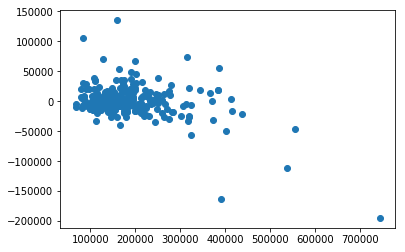

In [163]:
plt.scatter(y_val, grid.predict(X_val) - y_val)

[]

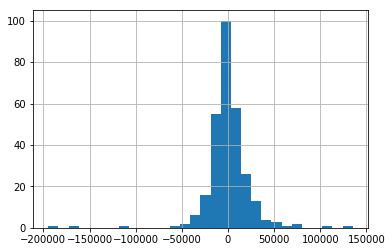

In [168]:
pd.Series(grid.predict(X_val) - y_val).hist(bins=30).plot()

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

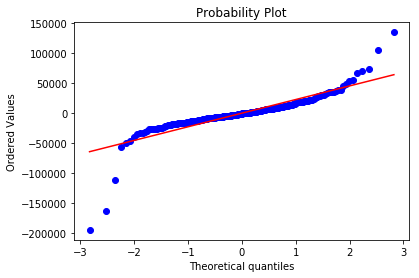

In [172]:
from scipy.stats import probplot
probplot(grid.predict(X_val) - y_val, plot=plt)

Residuals do not look normal. Pretty extreme values at either end.

## Second Pass

Only look at gradient boosting models without scaling. Use model based feature selection.

In [199]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
    ('regressor', GradientBoostingRegressor())
])

param_grid = { 'feature_selection': [SelectFromModel(RandomForestRegressor(n_estimators=100), threshold=0.0001),
                                     None],
               'regressor': [GradientBoostingRegressor(max_features=0.3),
                             XGBRegressor(),
                             CatBoostRegressor()],
               'regressor__max_depth': [3, 4, 5, 6],
              }
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 192007.1411559	total: 8.53ms	remaining: 8.53s
1:	learn: 186952.8881425	total: 15.3ms	remaining: 7.63s
2:	learn: 182069.6918677	total: 22.2ms	remaining: 7.37s
3:	learn: 177307.0776562	total: 28.8ms	remaining: 7.18s
4:	learn: 172818.1095609	total: 34.7ms	remaining: 6.91s
5:	learn: 168238.1486220	total: 40.9ms	remaining: 6.77s
6:	learn: 163975.8815801	total: 46.4ms	remaining: 6.58s
7:	learn: 159711.8837850	total: 52.2ms	remaining: 6.48s
8:	learn: 155786.4531074	total: 57.5ms	remaining: 6.33s
9:	learn: 151940.1473838	total: 64.6ms	remaining: 6.39s
10:	learn: 148139.2334652	total: 70.4ms	remaining: 6.33s
11:	learn: 144550.8577087	total: 75.8ms	remaining: 6.24s
12:	learn: 140890.2723707	total: 80.8ms	remaining: 6.13s
13:	learn: 137306.5139227	total: 83ms	remaining: 5.85s
14:	learn: 133930.7867794	total: 88.1ms	remaining: 5.79s
15:	learn: 130587.6217052	total: 93.3ms	remaining: 5.74s
16:	learn: 127521.8539414	total: 98.5ms	remaining: 5.7s
17:	learn: 124490.1328098	total: 104ms	remai

176:	learn: 23197.1728075	total: 991ms	remaining: 4.61s
177:	learn: 23129.9026081	total: 996ms	remaining: 4.6s
178:	learn: 23084.5651334	total: 999ms	remaining: 4.58s
179:	learn: 23024.7080523	total: 1s	remaining: 4.57s
180:	learn: 22975.9549912	total: 1.01s	remaining: 4.57s
181:	learn: 22928.4496105	total: 1.02s	remaining: 4.57s
182:	learn: 22876.6318528	total: 1.03s	remaining: 4.58s
183:	learn: 22811.9039198	total: 1.03s	remaining: 4.58s
184:	learn: 22746.3763112	total: 1.04s	remaining: 4.58s
185:	learn: 22697.0822653	total: 1.04s	remaining: 4.57s
186:	learn: 22670.5358620	total: 1.05s	remaining: 4.56s
187:	learn: 22624.8178029	total: 1.05s	remaining: 4.56s
188:	learn: 22604.9986903	total: 1.06s	remaining: 4.55s
189:	learn: 22584.8161030	total: 1.06s	remaining: 4.53s
190:	learn: 22544.6168043	total: 1.07s	remaining: 4.52s
191:	learn: 22484.8211365	total: 1.07s	remaining: 4.52s
192:	learn: 22424.9881629	total: 1.08s	remaining: 4.51s
193:	learn: 22406.8678746	total: 1.08s	remaining: 4.

326:	learn: 19519.8365510	total: 1.77s	remaining: 3.65s
327:	learn: 19517.2771686	total: 1.78s	remaining: 3.65s
328:	learn: 19506.6317293	total: 1.78s	remaining: 3.64s
329:	learn: 19505.9168678	total: 1.79s	remaining: 3.63s
330:	learn: 19496.2215293	total: 1.79s	remaining: 3.63s
331:	learn: 19479.6138926	total: 1.8s	remaining: 3.62s
332:	learn: 19475.8542099	total: 1.81s	remaining: 3.62s
333:	learn: 19457.9292288	total: 1.81s	remaining: 3.61s
334:	learn: 19456.0067929	total: 1.82s	remaining: 3.61s
335:	learn: 19454.2971408	total: 1.82s	remaining: 3.6s
336:	learn: 19433.8421060	total: 1.83s	remaining: 3.6s
337:	learn: 19405.0009899	total: 1.83s	remaining: 3.59s
338:	learn: 19395.4418886	total: 1.84s	remaining: 3.58s
339:	learn: 19392.6999648	total: 1.84s	remaining: 3.58s
340:	learn: 19379.8338195	total: 1.85s	remaining: 3.57s
341:	learn: 19370.3716540	total: 1.85s	remaining: 3.56s
342:	learn: 19359.7544427	total: 1.86s	remaining: 3.56s
343:	learn: 19358.3636952	total: 1.86s	remaining: 3

510:	learn: 17804.4898927	total: 2.73s	remaining: 2.62s
511:	learn: 17801.6730251	total: 2.74s	remaining: 2.61s
512:	learn: 17801.4615427	total: 2.74s	remaining: 2.6s
513:	learn: 17795.2088929	total: 2.75s	remaining: 2.6s
514:	learn: 17793.3944530	total: 2.76s	remaining: 2.6s
515:	learn: 17792.1221739	total: 2.76s	remaining: 2.59s
516:	learn: 17791.1419709	total: 2.77s	remaining: 2.58s
517:	learn: 17790.6731898	total: 2.77s	remaining: 2.58s
518:	learn: 17783.1442852	total: 2.78s	remaining: 2.57s
519:	learn: 17763.7299432	total: 2.78s	remaining: 2.57s
520:	learn: 17759.6429001	total: 2.79s	remaining: 2.56s
521:	learn: 17723.0831583	total: 2.79s	remaining: 2.56s
522:	learn: 17720.5285996	total: 2.8s	remaining: 2.55s
523:	learn: 17715.9559707	total: 2.8s	remaining: 2.54s
524:	learn: 17710.9428024	total: 2.81s	remaining: 2.54s
525:	learn: 17710.2097512	total: 2.81s	remaining: 2.53s
526:	learn: 17704.9971434	total: 2.82s	remaining: 2.53s
527:	learn: 17700.6974840	total: 2.82s	remaining: 2.5

658:	learn: 16958.6384563	total: 3.5s	remaining: 1.81s
659:	learn: 16955.8400309	total: 3.51s	remaining: 1.81s
660:	learn: 16955.6772814	total: 3.52s	remaining: 1.8s
661:	learn: 16951.9962189	total: 3.52s	remaining: 1.8s
662:	learn: 16950.6811535	total: 3.53s	remaining: 1.79s
663:	learn: 16944.5238150	total: 3.54s	remaining: 1.79s
664:	learn: 16943.9408566	total: 3.54s	remaining: 1.78s
665:	learn: 16938.7720679	total: 3.55s	remaining: 1.78s
666:	learn: 16932.7275170	total: 3.55s	remaining: 1.77s
667:	learn: 16932.3104762	total: 3.56s	remaining: 1.77s
668:	learn: 16931.3577506	total: 3.56s	remaining: 1.76s
669:	learn: 16931.1829009	total: 3.57s	remaining: 1.76s
670:	learn: 16921.8712997	total: 3.57s	remaining: 1.75s
671:	learn: 16913.6748456	total: 3.58s	remaining: 1.75s
672:	learn: 16906.8053963	total: 3.58s	remaining: 1.74s
673:	learn: 16901.4455518	total: 3.59s	remaining: 1.73s
674:	learn: 16900.6473980	total: 3.59s	remaining: 1.73s
675:	learn: 16899.7705779	total: 3.6s	remaining: 1.

806:	learn: 16543.4628713	total: 4.27s	remaining: 1.02s
807:	learn: 16534.4597353	total: 4.28s	remaining: 1.01s
808:	learn: 16534.0216485	total: 4.28s	remaining: 1.01s
809:	learn: 16533.9336718	total: 4.28s	remaining: 1s
810:	learn: 16533.5783442	total: 4.29s	remaining: 1000ms
811:	learn: 16531.9966992	total: 4.29s	remaining: 994ms
812:	learn: 16531.5965264	total: 4.3s	remaining: 989ms
813:	learn: 16531.4965564	total: 4.3s	remaining: 984ms
814:	learn: 16512.0351515	total: 4.31s	remaining: 978ms
815:	learn: 16511.7900022	total: 4.32s	remaining: 973ms
816:	learn: 16511.2411693	total: 4.32s	remaining: 968ms
817:	learn: 16510.8413866	total: 4.32s	remaining: 962ms
818:	learn: 16510.5128657	total: 4.33s	remaining: 957ms
819:	learn: 16509.7321805	total: 4.33s	remaining: 951ms
820:	learn: 16508.9831851	total: 4.34s	remaining: 946ms
821:	learn: 16508.9066636	total: 4.34s	remaining: 941ms
822:	learn: 16508.8313884	total: 4.35s	remaining: 935ms
823:	learn: 16507.9047618	total: 4.35s	remaining: 93

963:	learn: 16224.8267721	total: 5.02s	remaining: 187ms
964:	learn: 16224.7735412	total: 5.02s	remaining: 182ms
965:	learn: 16221.1965896	total: 5.03s	remaining: 177ms
966:	learn: 16221.0457983	total: 5.04s	remaining: 172ms
967:	learn: 16220.8911292	total: 5.04s	remaining: 167ms
968:	learn: 16220.7161035	total: 5.04s	remaining: 161ms
969:	learn: 16215.3449235	total: 5.05s	remaining: 156ms
970:	learn: 16215.2563400	total: 5.06s	remaining: 151ms
971:	learn: 16215.2343195	total: 5.06s	remaining: 146ms
972:	learn: 16215.2225220	total: 5.06s	remaining: 140ms
973:	learn: 16208.9326121	total: 5.07s	remaining: 135ms
974:	learn: 16208.8154791	total: 5.07s	remaining: 130ms
975:	learn: 16208.1702275	total: 5.08s	remaining: 125ms
976:	learn: 16206.6411731	total: 5.08s	remaining: 120ms
977:	learn: 16206.0472755	total: 5.09s	remaining: 114ms
978:	learn: 16204.6989848	total: 5.09s	remaining: 109ms
979:	learn: 16204.3493438	total: 5.1s	remaining: 104ms
980:	learn: 16204.0392675	total: 5.1s	remaining: 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('feature_selection', SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
         ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'feature_selection': [SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
 ..., <catboost.core.CatBoostRegressor object at 0x7fd1816b9588>], 'regressor__max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=T

In [205]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_depth', 'param_feature_selection',
            'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_depth,param_feature_selection,rank_test_score,rmsle
11,<catboost.core.CatBoostRegressor object at 0x7...,6,SelectFromModel(estimator=RandomForestRegresso...,1,0.129403
1,"GradientBoostingRegressor(alpha=0.9, criterion...",4,SelectFromModel(estimator=RandomForestRegresso...,2,0.129451
14,"GradientBoostingRegressor(alpha=0.9, criterion...",5,None,3,0.130433
23,<catboost.core.CatBoostRegressor object at 0x7...,6,None,4,0.131280
10,<catboost.core.CatBoostRegressor object at 0x7...,5,SelectFromModel(estimator=RandomForestRegresso...,5,0.132134
13,"GradientBoostingRegressor(alpha=0.9, criterion...",4,None,6,0.132136
22,<catboost.core.CatBoostRegressor object at 0x7...,5,None,7,0.132418
12,"GradientBoostingRegressor(alpha=0.9, criterion...",3,None,8,0.132459
15,"GradientBoostingRegressor(alpha=0.9, criterion...",6,None,9,0.132638
2,"GradientBoostingRegressor(alpha=0.9, criterion...",5,SelectFromModel(estimator=RandomForestRegresso...,10,0.132722


In [201]:
np.sqrt(-grid.score(X_val, y_val))

0.1322916619216565

* Cat boost seems to do well but might do even better if I hadn't one hot encoded the data.
* Feature selection seemed to help a little with a low threshold